### 1 Pytorch para implementar Redes Neuronales

PyTorch es una de las librerías de aprendizaje profundo más populares disponibles actualmente (junto con TensorFlow) y nos permite implementar redes neuronales de manera mucho más eficiente que cualquiera de nuestras implementaciones anteriores en NumPy. Pytorch nos permite realizar cómputo en GPU. Podemos pensar en una tarjeta gráfica como un pequeño clúster informático dentro de nuestra máquina. El reto es que escribir código para dirigirlo a las GPU no es tan sencillo como ejecutar código Python en nuestro intérprete. Existen
paquetes especiales, como CUDA y OpenCL, que nos permiten dirigirnos a la GPU. Sin embargo, escribir código en CUDA u OpenCL no es el entorno más conveniente para implementar y ejecutar algoritmos de aprendizaje automático.

#### 1.1 ¿Qué es Pytorch?

Pytorch es una interfaz de programación escalable y multiplataforma para implementar y ejecutar algoritmos de aprendizaje automático y, principalmente, de aprendizaje profundo.

Fue desarrollado principalmente por investigadores e ingenieros del laboratorio de inteligencia artificial de Facebook (Facebook AI). Su desarrollo también involucra muchas contribuciones de la comunidad.

Fue lanzado inicialmente en septiembre de 2016, es gratuito y de código abierto.

Para mejorar el rendimiento del entrenamiento de los modelos de aprendizaje automático, partic ularmente modelos de aprendizaje profundo, Pytorch permite su ejecución tanto en CPU como en GPU (además de dispositivos TPU). Sin embargo, su mayor capacidad de rendimiento se puede descubrir cuando se utilizan las GPU’s (también las TPU’s).

Instalación:
En en el entorno virtual ima539, ejecutar la siguiente sentencia:
(ima539) ~ $ conda install pytorch=2.0.1 torchvision=0.15.2 torchaudio=2.0.2 pytorch-cuda=11.7 -c pytorch -c nvidia

In [3]:
import torch
gpu_pytorch = torch.cuda.device_count()
if gpu_pytorch:
    ngpus = torch.cuda.device_count()
print(f'PyTorch está usando la GPU?: {"SI! :)" if gpu_pytorch else "No :("}')
if gpu_pytorch:
    print(f'{ngpus} GPU reconocida por PyTorch')

PyTorch está usando la GPU?: No :(


Pytorch está construido para maniúlar tensores. Los tensores pueden entenderse como una generalización de escalares, vectores, matrices, etc. En este sentido, un escalar puede
definirse como un tensor de orden (rango) 0, un vector como un tensor de orden 1, una matriz como un tensor de orden 2 y las matrices apiladas en una tercera dimensión como tensores de orden 3.

Los tensores en PyTorch son similares a los arrays de NumPy, excepto que los tensores de Pytorch están optimizados para la diferenciación automática y pueden ejecutarse en GPU’s.

#### 1.2 Creación de tensores con Pytorch

In [4]:
import numpy as np
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [5]:
t_ones = torch.ones(2, 3)
print(t_ones.shape)
print(t_ones)

torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [6]:
rand_tensor = torch.rand(2,3)
print(rand_tensor)

tensor([[0.6740, 0.9470, 0.4408],
        [0.0380, 0.4929, 0.5043]])


In [7]:
m = np.array([[4, 5, 6],[3, 4, 5]], dtype=np.int32)
t_m = torch.from_numpy(m)
t_m

tensor([[4, 5, 6],
        [3, 4, 5]], dtype=torch.int32)

In [8]:
m = np.array([[[4, 5, 6],[3, 4, 5]],[[4, 5, 6],[3, 4, 5]]], dtype=np.float64)
t_m = torch.from_numpy(m)
t_m

tensor([[[4., 5., 6.],
         [3., 4., 5.]],

        [[4., 5., 6.],
         [3., 4., 5.]]], dtype=torch.float64)

In [9]:
t_m.shape

torch.Size([2, 2, 3])

In [10]:
torch.manual_seed(1.)
t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))
print(t1,'\n',t2)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]]) 
 tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])


In [11]:
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [12]:
t4 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t4)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [13]:
t5 = torch.mean(t1, axis=0)
print(t5)

tensor([-0.1373,  0.2028])


In [14]:
t5 = torch.mean(t1, axis=1)
print(t5)

tensor([ 0.0369,  0.1378, -0.1709,  0.1515,  0.0083])


In [15]:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


In [16]:
np.sqrt(np.sum(np.square(t1.numpy()), axis=1))

array([0.67846215, 0.5078282 , 1.1162277 , 0.5487652 , 0.18525197],
      dtype=float32)

#### 1.2.1 Regresión Lineal por Mínimos Cuadrados
                        𝑧 = 𝑤 × 𝑥 + 𝑏



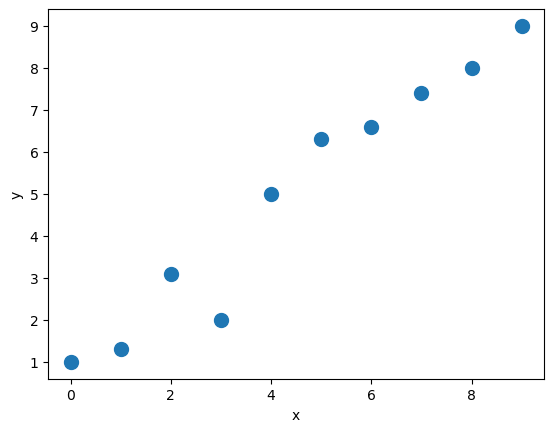

In [17]:
import matplotlib.pyplot as plt
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,
7.4, 8.0, 9.0], dtype='float32')
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('figures/12_07.pdf')
plt.show()

In [18]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
# On some computers the explicit cast to .float() is necessary
y_train = torch.from_numpy(y_train).float()
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [19]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)
def model(xb):
    return xb @ weight + bias

In [20]:
def loss_fn(input, target):
    return (input-target).pow(2).mean()

In [21]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 45.0782
Epoch 10 Loss 26.4366
Epoch 20 Loss 1.5918
Epoch 30 Loss 14.1307
Epoch 40 Loss 11.6038
Epoch 50 Loss 6.3084
Epoch 60 Loss 0.6349
Epoch 70 Loss 3.1374
Epoch 80 Loss 1.9999
Epoch 90 Loss 0.3133
Epoch 100 Loss 0.7653
Epoch 110 Loss 1.0039
Epoch 120 Loss 0.0235
Epoch 130 Loss 0.5176
Epoch 140 Loss 0.0759
Epoch 150 Loss 1.8789
Epoch 160 Loss 0.0008
Epoch 170 Loss 0.0866
Epoch 180 Loss 0.0646
Epoch 190 Loss 0.0011


Parámetros finales: 2.6696107387542725 4.879678249359131


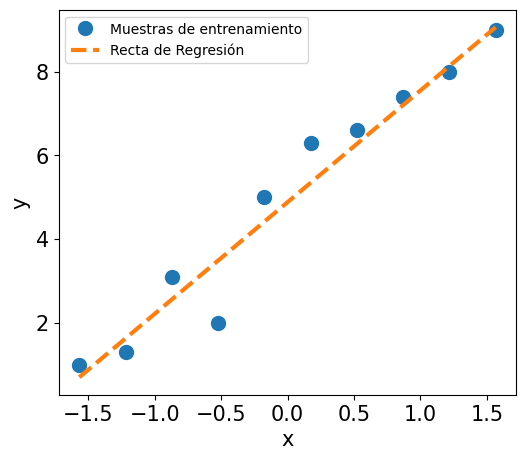

In [22]:
print('Parámetros finales:', weight.item(), bias.item())
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Muestras de entrenamiento', 'Recta de Regresión'], fontsize=10)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
#plt.savefig('figures/12_08.pdf')
plt.show()

#### 1.3 Implementación de un Multilayer Perceptron
Módulo torch.nn: https://pytorch.org/docs/stable/nn.html?highlight=nn#module-torch.nn

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3,random_state=1)

In [24]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 4
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [25]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x
    
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)

In [26]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
loss_hist[epoch] /= len(train_dl.dataset)
accuracy_hist[epoch] /= len(train_dl.dataset)

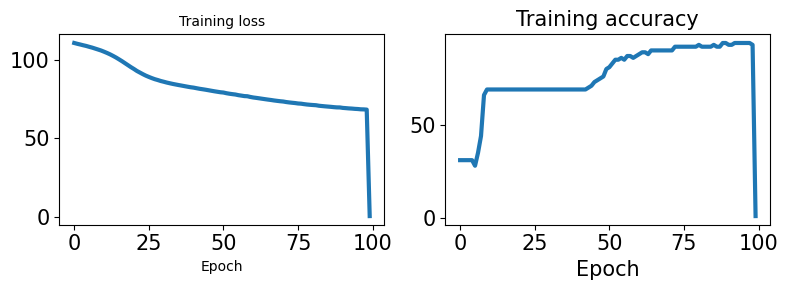

In [27]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=10)
ax.set_xlabel('Epoch', size=10)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
#plt.savefig('figures/12_09.pdf')
plt.show()

In [28]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


In [29]:
path = 'iris_classifier.pt'
torch.save(model, path)

In [30]:
model_new = torch.load(path)
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [31]:
pred_test = model_new(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


### 2 Examinando Funciones de Activación
#### 2.1 Sigmoide
                    𝜙(𝑧) = 1/(1 + 𝑒−𝑧)

In [32]:
X = np.array([1, 1.4, 2.5])
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print('P(y=1|x) = %.3f' % logistic_activation(X, w))

P(y=1|x) = 0.888


In [33]:
W = np.array([[1.1, 1.2, 0.8, 0.4],[0.2, 0.4, 1.0, 0.2],[0.6, 1.5, 1.2, 0.7]])
A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)

print('Net Input: \n', Z)
print('Output Units:\n', y_probas)

Net Input: 
 [1.78 0.76 1.65]
Output Units:
 [0.85569687 0.68135373 0.83889105]


In [34]:
y_class = np.argmax(Z, axis=0)
print('Predicted class label: %d' % y_class)

Predicted class label: 0


#### 2.2 Softmax

In [35]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('Probabilities:\n', y_probas)

Probabilities:
 [0.44668973 0.16107406 0.39223621]


In [36]:
np.sum(y_probas)

1.0

#### 2.3 ReLU
                        𝜙(𝑧) = 𝑚𝑎𝑥 (0, 𝑧)


In [37]:
def relu(z):
    return np.maximum(z, 0.)

y_relu = relu(Z)
print(Z)
print(y_relu)

[1.78 0.76 1.65]
[1.78 0.76 1.65]


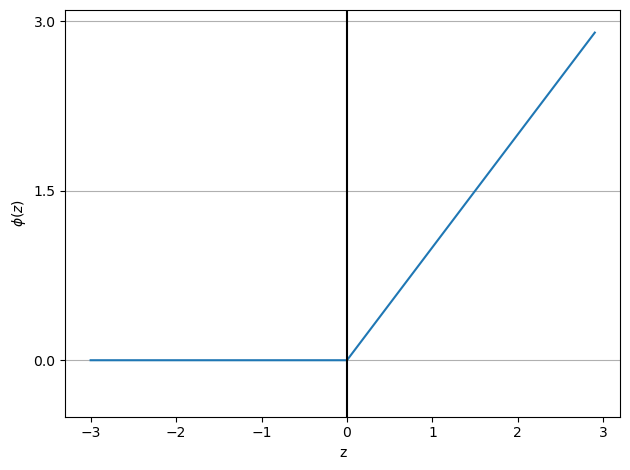

In [38]:
z = np.arange(-3, 3, 0.1)
phi_z = relu(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.5, 3.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.,1.5,3.])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()